#**Assignment 1: Wrangling and EDA**
Foundations of Machiene Learning

### Yannely Escalante-Ruiz
###ID: usw5zk

In [ ]:
! git clone https://github.com/yannelye/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q1.** This question provides some practice cleaning variables which have common problems.

1. **Numeric variable:** For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with?  
   *(Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)*

2. **Categorical variable:** For the Minnesota police use of force data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value **Yes** when a person was injured by police, and **No** when no injury occurred.  
   What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?  
   For the remaining missing values, replace the `np.nan` / `None` values with the label **Missing**.

3. **Dummy variable:** For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.

4. **Missing values:** For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?


In [ ]:
import pandas as pd
import numpy as np
df_airbnb = pd.read_csv("/content/data/airbnb_NYC.csv", encoding="latin1")
df_airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
#Q1.1 Check datatype
df_airbnb['Price'].dtype

dtype('O')

In [ ]:
#Q1.1 Clean price
df_airbnb["Price_clean"] = (
    df_airbnb["Price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)
df_airbnb["Price_clean"] = pd.to_numeric(df_airbnb["Price_clean"], errors="coerce")

In [ ]:
#Q1.1 Count missing values (prices)
missing_prices = df_airbnb["Price_clean"].isna().sum()
missing_prices

np.int64(0)

**Q1.1 Answer:** At first, the price variable was saved as an object instead of a numeric value. Prices above 999 dollars included commas, which caused issues when trying to convert them. To fix this, I removed the commas and any other non-numeric formatting, such as dollar signs, and then converted the variable to numeric. After cleaning the data, there were no missing values left.

In [ ]:
#Q1.2
df_mn = pd.read_csv("/content/data/mn_police_use_of_force.csv")

# Standardize to lowercase strings
df_mn["subject_injury_clean"] = df_mn["subject_injury"].astype(str).str.lower().str.strip()

In [ ]:
#Q1.2

# Map different patterns to Yes/No
yes_vals = ["yes", "y", "injury", "injured"]
no_vals = ["no", "n", "none", "no injury"]

df_mn["subject_injury_clean"] = df_mn["subject_injury_clean"].replace({
    val: "Yes" for val in yes_vals
}).replace({
    val: "No"  for val in no_vals
})

#Convert anything else to NaN
df_mn["subject_injury_clean"] = df_mn["subject_injury_clean"].where(
    df_mn["subject_injury_clean"].isin(["Yes", "No"]),
    other=pd.NA
)

In [ ]:
#Q1.2
missing_prop = df_mn["subject_injury_clean"].isna().mean()
missing_prop

np.float64(0.7619342359767892)

In [ ]:
#Q1.2
pd.crosstab(df_mn["subject_injury_clean"], df_mn["force_type"], dropna=False)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


In [ ]:
#Q1.2
df_mn["subject_injury_clean"] = df_mn["subject_injury_clean"].fillna("Missing")

**Q1.2 Answer:**

After cleaning subject_injury_clean, I found that roughly 76.2% of values were missing. These missing entries are not evenly spread across all force types. Instead, many of them show up in specific categories like Bodily Force, Taser, and Chemical Irritants. This points to a clear pattern where certain types of force are more likely to have missing injury information than others.

In [ ]:
#Q1.3

df_meta = pd.read_csv("/content/data/metabric.csv")

#Standardize the text
df_meta["Overall Survival Status"] = (
    df_meta["Overall Survival Status"]
    .astype(str)
    .str.split(":")
    .str[-1]
    .str.lower()
    .str.strip()
)

#Create a dummy variable
df_meta["overall_survival_dummy"] = df_meta["Overall Survival Status"].map({
    "living": 1,
    "deceased": 0

})

In [ ]:
#Q1.4
df_airbnb = pd.read_csv("/content/data/airbnb_NYC.csv", encoding="latin1")

#Count missing values
missing_count = df_airbnb["Review Scores Rating"].isna().sum()
missing_count

np.int64(8323)

In [ ]:
#Q1.4

#Impute missing values with the median
median_rating = df_airbnb["Review Scores Rating"].median()
df_airbnb["Review Scores Rating Imputed"] = df_airbnb["Review Scores Rating"].fillna(median_rating)


**Q1.4 Answer:**

Filling in missing values with the median can skew the data because it reduces its natural spread. If missing values aren't random, putting them all in the middle can misrepresent the true distribution and lead to misleading conclusions or flawed models.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a CSV file, so `read_csv` won’t work. What does work?

2. Drop any columns that do not contain data.

3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.

4. Clean the `Year` variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

5. Clean the `Age` variable and make a histogram of the ages of the victims.

6. Clean the `Type` variable so it only takes three values: **Provoked**, **Unprovoked**, and **Unknown**. What proportion of attacks are unprovoked?

7. Clean the `Fatal Y/N` variable so it only takes three values: **Y**, **N**, and **Unknown**.

8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?


In [ ]:
#Q2.1
import pandas as pd
df_shark = pd.read_excel("/content/GSAF5.xls")
df_shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Q2.1 Answer:**

Since the shark attack dataset is an Excel file, read_csv would not work. I decided to use pd.read_excel to open the file

**Q2.3 Answer:**

In this dataset, each observation represents a single shark attack. Each row gives details about that incident, like the date, type, year, etc. Understanding that an observation is one attack helps us clean and analyze the data at the level of each attack.

In [ ]:
#Q2.4

#Clean the Year column
df_shark["Year"] = pd.to_numeric(df_shark["Year"], errors="coerce")

In [ ]:
#Q2.4

#Look at the range of years
df_shark["Year"].min(), df_shark["Year"].max()

(0.0, 2026.0)

In [ ]:
#Q2.4

#Filter to attacks since 1940
df_recent = df_shark[df_shark["Year"] >= 1940]

In [ ]:
#Q2.4

#Count attacks per year to see trend
attacks_per_year = df_recent.groupby("Year").size()
attacks_per_year

,0
Year,
1940.0,24
1941.0,27
1942.0,41
1943.0,28
1944.0,31
...,...
2022.0,98
2023.0,109
2024.0,52


**Q2.4 Answer:**

After cleaning, the Year values ranged from 0 to 2026, with 0 and 2026 likely being errors. 0 being missing entries, and 2026 being an error because the year has just begun. Looking at attacks since 1940, the number has generally gone up, with recent years seeing the most. The small drop in 2025-2026 is porbably because of icomplete reporting. Overall, shark attacks appear to be increasing over time.

<Axes: >

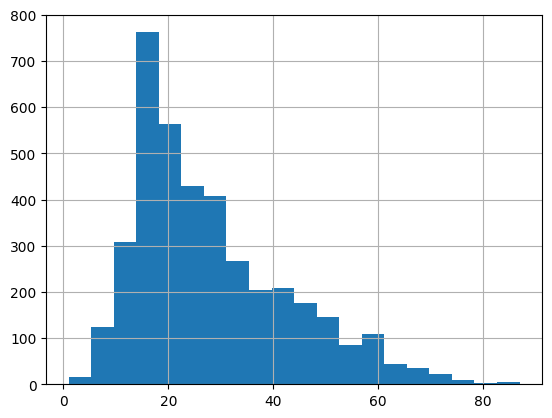

In [ ]:
#Q2.5

#Clean the age variable
df_shark["Age_clean"] = pd.to_numeric(df_shark["Age"], errors="coerce")

#Make a histogram
df_shark["Age_clean"].hist(bins=20)

In [ ]:
#Q2.6

#Standardize the text (Lowercase everything and strip spaces)
df_shark["Type_clean"] = df_shark["Type"].str.lower().str.strip()

#Map valid categories
df_shark["Type_clean"] = df_shark["Type_clean"].replace({
    "unprovoked": "Unprovoked",
    "provoked": "Provoked"

})

#Everything else becomes unknown
df_shark["Type_clean"] = df_shark["Type_clean"].where(
    df_shark["Type_clean"].isin(["Unprovoked", "Provoked"]),
    "Unknown"
)

#Calculate the proportion of unprovoked attacks
(df_shark["Type_clean"] == "Unprovoked").mean()

np.float64(0.7387616624257846)

**Q2.6 Answer:**

Around 73.9% of shark attacks are unprovoked.

In [ ]:
#Q2.7

#Standardize the text (Lowercase and strip spaces)
df_shark["Fatal_clean"] = df_shark["Fatal Y/N"].astype(str).str.lower().str.strip()

#Map valid entries
df_shark["Fatal_clean"] = df_shark["Fatal_clean"].replace({
    "y": "Y",
    "n": "N"
})

#Everything else becomes Unknown
df_shark["Fatal_clean"] = df_shark["Fatal_clean"].where(
    df_shark["Fatal_clean"].isin(["Y", "N"]),
    "Unknown"
)

In [ ]:
#Q2.8
df_shark.groupby("Type_clean")["Fatal_clean"].value_counts(normalize=True)

Type_clean  Fatal_clean
Provoked    N              0.953416
            Y              0.032609
            Unknown        0.013975
Unknown     Unknown        0.460963
            N              0.372924
            Y              0.166113
Unprovoked  N              0.742250
            Y              0.242633
            Unknown        0.015117
Name: proportion, dtype: float64

**Q2.8 Answer:**

Fatality rates show that provoked attaccks are deadly about 3% of the time, while unprovoked attacks are fatal around 24%. This suggests unprovoked attacks are more dangerous, likely becaue they happen in deeper water or involve sharks mistaking the victim for prey.

**Q3.** Open the `tidy_data.pdf` document available at  
https://github.com/ds4e/wrangling, which is a paper called *Tidy Data* by Hadley Wickham.

1. Read the abstract. What is this paper about?

2. Read the introduction. What is the “tidy data standard” intended to accomplish?

3. Read the introduction to Section 2. What does this sentence mean:  
   *“Like families, tidy datasets are all alike but every messy dataset is messy in its own way.”*  
   What does this sentence mean:  
   *“For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.”*

4. Read Section 2.2. How does Wickham define values, variables, and observations?

5. How is “Tidy Data” defined in Section 2.3?

6. Read the introduction to Section 3 and Section 3.1. What are the five most common problems with messy datasets? Why are the data in Table 4 messy? What is “melting” a dataset?

7. Why, specifically, is table 11 messy but table 12 tidy and “molten”?

1. The paper explains that much of the time spent in data analysis is spent cleaning and restructuring data before you can actually analyze it. Hadley Wickham introduces the concept of tidy data, which is a specific way to organize datasets so that each variable, observation, and value follows a consistent structure. By using tidy data, analysts can work more efficiently because the data is easier to manipulate, model, and visualize, and many tools can automatically work with it. The paper also shows examples of common messy datasets and how to transform them into a tidy format.

2. The tidy data standard is meant to provide a consistent framework for organizing data. Its goal is to make datasets predictable so that tools and analysts can work with them without constantly figuring out the structure from scratch. By following a tidy standard, datasets become easier to clean, explore, and visualize. It also allows different tools to work together more smoothly, because they can assume that variables, observations, and values are arranged consistently. Essentially, it helps analysts spend less time wrestling with messy data and more time actually analyzing it.

3. “Like families, tidy datasets are all alike but every messy dataset is messy in its own way.”
This means that tidy datasets all follow the same rules: each variable gets its own column, each observation its own row, and each value its own cell. Because of this consistency, all tidy datasets look similar in structure. In contrast, messy datasets can be disorganized in countless ways — some might have multiple variables in one column, others might have rows representing multiple observations. There’s no single “messy format,” so every messy dataset requires a slightly different approach to fix.

“For a given dataset, it’s usually easy to figure out what are observations and what are variables are, but it is surprisingly difficult to precisely define variables and observations in general.”
Here, Wickham is pointing out that in practice, you can often look at a dataset and see which rows are observations and which columns are variables. But trying to create a universal definition that works for all datasets is hard. Datasets vary widely in format, structure, and content, so what counts as a “variable” in one dataset might be split or combined differently in another. This is why tidy data rules are helpful—they give a practical, consistent guideline even though precise definitions can be tricky.

4. Wickham defines these fundamental components like this:
* Value: A single piece of data, like the number 42 or the text “male.”
* Variable: A set of related values that all measure the same property, like “height” or “age.”
* Observation: A collection of values that describes a single unit, such as one person, one shark attack, or one experiment.

5. A dataset is considered tidy when it follows three main rules:
* Each variable gets its own column.
* Each observation gets its own row.
* Each value occupies a single cell.

6. Wickham identifies five ways datasets often get messy:

1..Column headers contain actual values instead of variable names.

2..Multiple variables are stored in the same column.

3..Variables are split across rows and columns.

4..Different types of observational units are combined in one table.

5..One type of observational unit is spread across multiple tables.

Why is Table 4 messy?

Table 4 is considered messy because its structure violates tidy data rules. For example, columns might include multiple variables, or the same variable might be split across several rows, making it unclear what counts as an observation or a variable.

What is “melting” a dataset?

Melting is a process used to reshape a dataset from wide format to long format. In wide format, multiple columns might represent different values of the same variable, whereas in long (or molten) format, there’s a single column for the variable names and a single column for their corresponding values. This transformation makes the dataset follow tidy rules and easier to work with.

7. Table 11 is messy because it mixes multiple variables in one column and splits variables across rows, so it doesn’t follow the tidy rules. Table 12 is the “molten” or long version of the same data: each variable has its own column, each observation has its own row, and each value is in a single cell. By converting Table 11 into this format, it becomes tidy and much easier to analyze and visualize.



**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.

2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

6. Which giftors provide the most money, in total?


In [ ]:
#Q4.1

#Load the data
import pandas as pd
df_gifts = pd.read_csv("/content/data/ForeignGifts_edu.csv")
df_gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [ ]:
df_gifts.columns

Index(['ID', 'OPEID', 'Institution Name', 'City', 'State',
       'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type',
       'Country of Giftor', 'Giftor Name'],
      dtype='object')

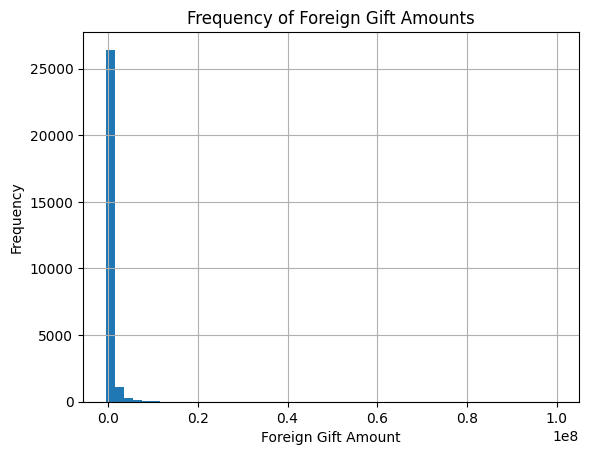

In [ ]:
#Q4.2

#Create the histogram
import matplotlib.pyplot as plt

df_gifts["Foreign Gift Amount"].hist(bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Frequency of Foreign Gift Amounts")
plt.show()

**Q4.2 Answer:**

The histogram of Foreign Gift Amount variable shows a strong right skew. Most foreign gifts are relatively small, and as the gift amounts get larger, they become much less common. In other words, the dataset is dominated by smaller gifts, with only a few large ones.

In [ ]:
#Q4.3

#Creating value counts table
df_gifts["Gift Type"].value_counts()

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [ ]:
#Q4.3

#Get proportions
df_gifts["Gift Type"].value_counts(normalize=True)

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


**Q4.3 Answer:**

Contracts make up the majority of the gifts at 61.2%. Monetary gifts sit around 38.75%. And real estate gifts sit around 0.039% of all the gifts.

In [ ]:
#Q4.4

#The top 15 countries by number of gifts
df_gifts.groupby("Country of Giftor").size().sort_values(ascending=False).head(15)

,0
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [ ]:
#Q4.4

#The top 15 countries by total amount given
df_gifts.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


**Q4.4 Answer:**

The top 15 countries by number of gifts are: England, China, Canada, Japan, Switzerland, Saudi Arabia, France, Germany, Hong Kong, South Korea, Qatar, The Netherlands, Korea, India, Taiwan.

The top 15 countries by amount given are: Qatar, England, China, Saudi Arabia, Bermuda, Canada, Hong Kong, Japan, Switzerland, India, Germany, United Arab Emirates, France, Singapore, Australia.

In [ ]:
#Q4.5

#Top 15 Institutions by Total Amount Received
df_gifts.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


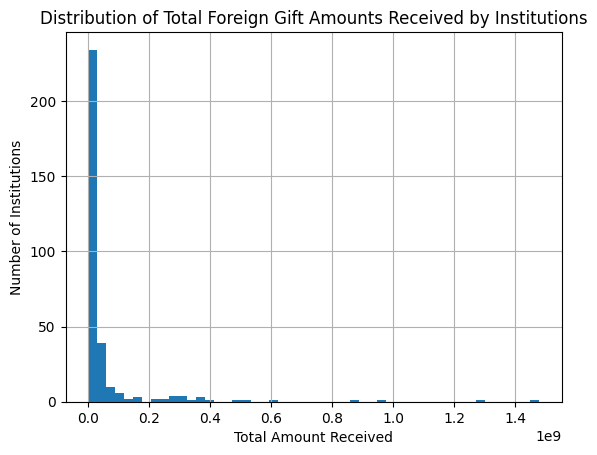

In [ ]:
#Q4.5

#Histogram of total amounts received
totals = df_gifts.groupby("Institution Name")["Foreign Gift Amount"].sum()
totals.hist(bins=50)
plt.xlabel("Total Amount Received")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gift Amounts Received by Institutions")
plt.show()

**Q4.5 Answer:**

The top 15 institutions by the total amount they received are: Carnegie Mellon University, Cornell University, Harvard University, Massachussets Institute of Technology, Yale University, Texas A&M University, Johns Hopkins University, Northwestern University, Georgetown University, University of Chicago, University of Colorado Boulder, Duke University, Brigham Young University, Stanford University, and University of Texas MD Anderson Cancer Center

In [ ]:
#Q4.6

#Finding giftors who provide most amount of money
df_gifts.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q4.6 Answer:**

Qatar Foundation.

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We will use the `college_completion.csv` dataset from the U.S. Department of Education. The relevant variables for this question are:

- `level` — Level of institution (4-year, 2-year)  
- `aid_value` — The average amount of student aid going to undergraduate recipients  
- `control` — Public, Private not-for-profit, Private for-profit  
- `grad_100_value` — Percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor’s-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.

2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of the data.

3. Cross-tabulate `control` and `level`. Describe the patterns you see in words.

4. For `grad_100_value`, create a kernel density plot and describe the distribution.  
   Now condition on `control`, and produce a kernel density plot and describe the distributions for each type of institutional control.  
   Which type of institution appears to have the most favorable graduation rates?

5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see.  
   Now make the same plot and statistics, but conditioning on `control`. Describe what you see.  
   For which kinds of institutions does aid seem to vary positively with graduation rates?


In [ ]:
#Q5.1

#Load the dataset
import pandas as pd
df_college = pd.read_csv("/content/data/college_completion.csv")

In [ ]:
#Q5.2

#Examine first few rows of data
df_college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
#Q5.2
df_college.shape

(3798, 63)

**Q5.2 Answer:**

There are 3798 observations and 63 variables in the data.

In [ ]:
#Q5.3

#Cross tabulate control and level
pd.crosstab(df_college["control"], df_college["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


**Q5.3 Answer:**

Some clear patterns stand out. Public colleges are more common in the 2-year category, while private colleges, especially not-for-profit dominate the 4-year category. Private for-profit colleges also appear more in 4 year- programs. Overall, public schools lead in 2-year programs, and private schools lead in 4-year programs.

<Axes: ylabel='Density'>

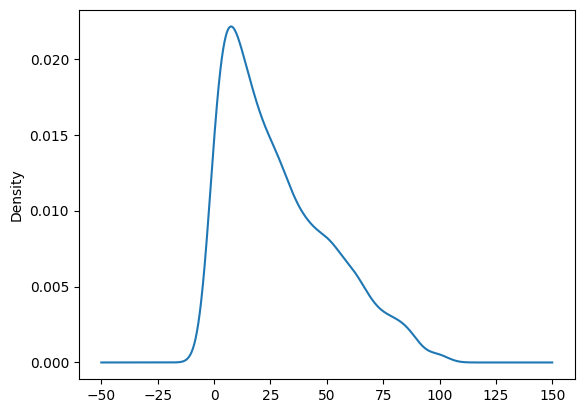

In [ ]:
#Q5.4

#KDE for all institutions
df_college["grad_100_value"].plot(kind="kde")

In [ ]:
#Q5.4

#Create a describe table
df_college["grad_100_value"].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


<Axes: xlabel='grad_100_value', ylabel='Density'>

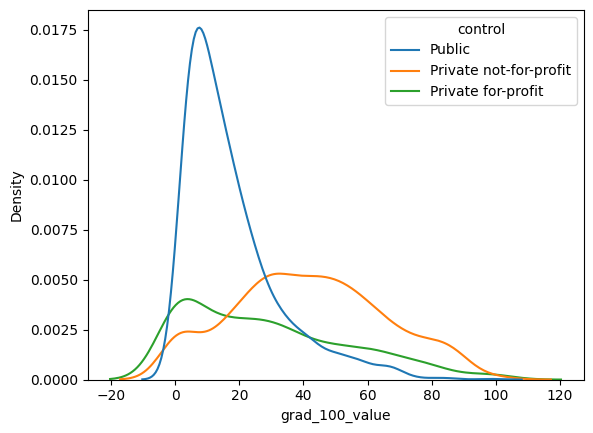

In [ ]:
#Q5.4

#KDE conditioned on control
import seaborn as sns
sns.kdeplot(data=df_college, x="grad_100_value", hue="control")

In [ ]:
#Q5.4

#Describe tables by control
df_college.groupby("control")["grad_100_value"].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


**Q5.4 Answer:**

Private not-for-profit colleges seem to have the highest graduation rates. The KDE curve for these schools is shifted farthest to the right, and their mean, median, and upper-quartile rates are all higher than those of other institution types.

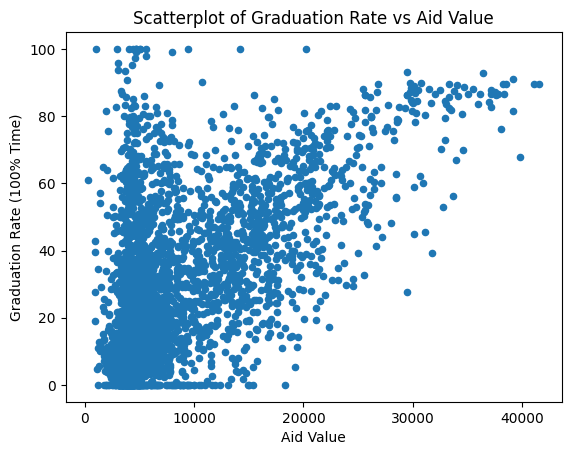

In [ ]:
#Q5.5

#Scatterplot of grad_100_value by aid_value
df_college.plot(kind="scatter", x="aid_value", y="grad_100_value")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Scatterplot of Graduation Rate vs Aid Value")
plt.show()

In [ ]:
#Q5.5

#Compute covariance
df_college[["aid_value", "grad_100_value"]].cov()

,aid_value,grad_100_value
aid_value,4.121201e+07,88610.483169
grad_100_value,8.861048e+04,543.483382


In [ ]:
#Q5.5

#Compute correlation
df_college[["aid_value", "grad_100_value"]].corr()

,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


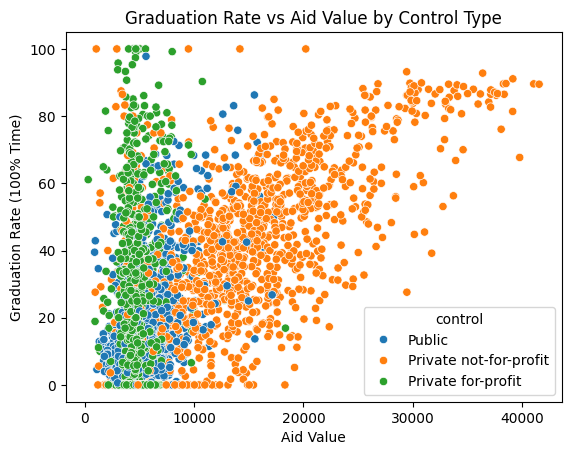

In [ ]:
#Q5.5

#Scatter plot of graduation rate vs aid, conditioning on control
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df_college,
    x="aid_value",
    y="grad_100_value",
    hue="control"
)

plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Graduation Rate vs Aid Value by Control Type")
plt.show()

In [ ]:
#Q5.5

#Measuring covariance by control
df_college.groupby("control")[["aid_value", "grad_100_value"]].cov()

aid_value  grad_100_value
control                                                            
Private for-profit     aid_value       1.957540e+06     6897.524957
                       grad_100_value  6.897525e+03      655.446387
Private not-for-profit aid_value       6.041488e+07   109274.123337
                       grad_100_value  1.092741e+05      554.660462
Public                 aid_value       4.564360e+06    15355.146212
                       grad_100_value  1.535515e+04      216.956489

In [ ]:
#Q5.5

#Measuring correlation by control
df_college.groupby("control")[["aid_value", "grad_100_value"]].corr()

aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
                       grad_100_value   0.482481        1.000000

1. The scatterplot and calculations show a clear upward trend: schools that give more financial aid tend to have higher graduation rates. The points are a bit spread out, but the general pattern is positive. This is confirmed by a positive covariance and correlation of about 0.576, showing a moderately strong relationship between aid and graduation rates.

2. Looking at institution types, the relationship varies. Private not-for-profit schools show the strongest positive trend, meaning more aid strongly relates to higher graduation rates. Public schools have a moderate positive correlation 0.48, while private for-profit schools show a weak link 0.19, so aid doesn't strongly affect graduation rates there. Overall, the strongest aid-graduation relationship is een in private not-for-proft institutions.

**Q6.** In class, we talked about how to compute the sample mean of a variable \(X\),

$$
m(X) = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

and the sample covariance of two variables \(X\) and \(Y\),

$$
\operatorname{cov}(X, Y) = \frac{1}{N} \sum_{i=1}^{N} (x_i - m(X))(y_i - m(Y)).
$$

Recall that the sample variance of \(X\) is

$$
s^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - m(X))^2.
$$

It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that is probably easiest.

We are going to look at **linear transformations** of \(X\), where

$$
Y = a + bX.
$$

So we take each value of \(X\), \(x_i\), and transform it as

$$
y_i = a + b x_i.
$$

1. Show that  
   $$
   m(a + bX) = a + b \, m(X).
   $$

2. Show that  
   $$
   \operatorname{cov}(X, X) = s^2.
   $$

3. Show that  
   $$
   \operatorname{cov}(X, a + bY) = b \, \operatorname{cov}(X, Y).
   $$

4. Show that  
   $$
   \operatorname{cov}(a + bX, a + bY) = b^2 \operatorname{cov}(X, Y).
   $$
   Notice this also means that  
   $$
   \operatorname{cov}(bX, bX) = b^2 s^2.
   $$

5. Suppose \(b > 0\) and let the median of \(X\) be \(\operatorname{med}(X)\).  
   Is it true that the median of \(a + bX\) is equal to  
   $$
   a + b \, \operatorname{med}(X)?
   $$  
   Is the IQR of \(a + bX\) equal to  
   $$
   a + b \, \operatorname{IQR}(X)?
   $$

6. Show by example that the means of \(X^2\) and \(\sqrt{X}\) are generally not  
   $$
   (m(X))^2 \quad \text{and} \quad \sqrt{m(X)}.
   $$  
   Thus, the results derived above depend on the linearity of the transformation  
   $$
   Y = a + bX,

**I struggled to upload the images, so all images are on my GitHub repository.**

Q7. This question provides some practice doing exploratory data analysis and visualization.

We'll use the ames_prices.csv dataset. The "relevant" variables for this question are:

* price - Sale price value of the house

* Bldg.Type - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the college_completion.csv data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use .groupby() to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [67]:
#Q7.1

#Load the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_ames = pd.read_csv("/content/data/ames_prices.csv")
df_ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


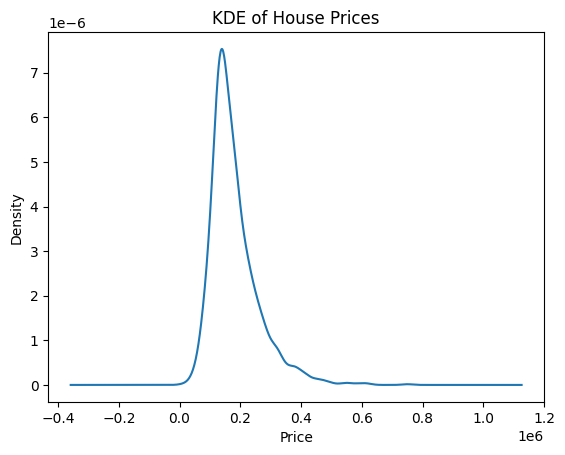

In [68]:
#Q7.2

#KDE plot of price
df_ames["price"].plot(kind="kde")
plt.xlabel("Price")
plt.title("KDE of House Prices")
plt.show()

In [69]:
#Q7.2

#Describe table for price
df_ames["price"].describe()

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


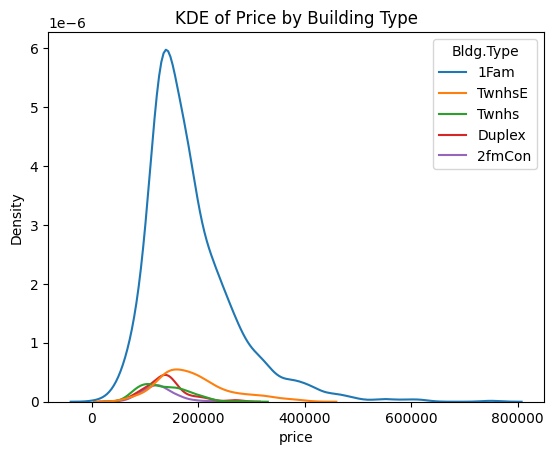

In [70]:
#Q7.2

#KDE plot of price by building type
sns.kdeplot(data=df_ames, x="price", hue="Bldg.Type")
plt.title("KDE of Price by Building Type")
plt.show()

In [71]:
#Q7.2

#Describe table by building type
df_ames.groupby("Bldg.Type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


**Q7.2 Answer:**

End-unit townhomes and single-family homes are the most expensive on average. Single-family homes have the highest variance in transaction prices, demonstrating their prices are spread out over a wider range. End-unit townhomes has the second-highest variance.

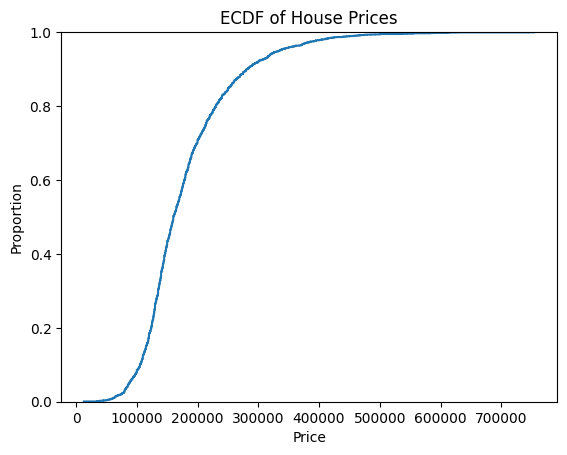

In [72]:
#Q7.3

#ECDF Plot of Price
sns.ecdfplot(df_ames["price"])
plt.xlabel("Price")
plt.title("ECDF of House Prices")
plt.show()

In [73]:
#Q7.3

#Five number summary
df_ames["price"].quantile([0, 0.25, 0.5, 0.75, 1])

,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


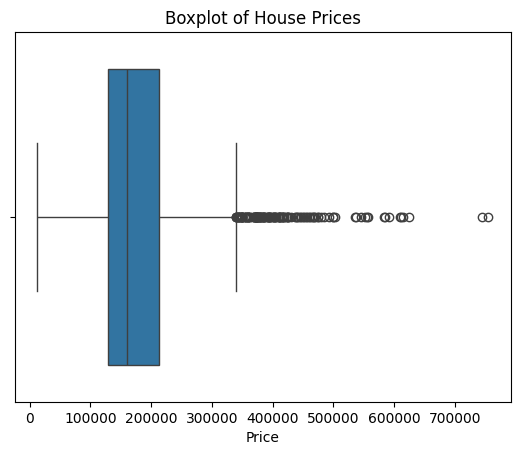

In [74]:
#Q7.4

#Boxplot of Price
sns.boxplot(x=df_ames["price"])
plt.title("Boxplot of House Prices")
plt.xlabel("Price")
plt.show()

**Q7.4 Answer:**

Yes, the boxplot shows outliers on the higher end of the price distribution. These points appear above the upper whisker. It shows that some homes are sold for much higher prices than the rest of the dataset.

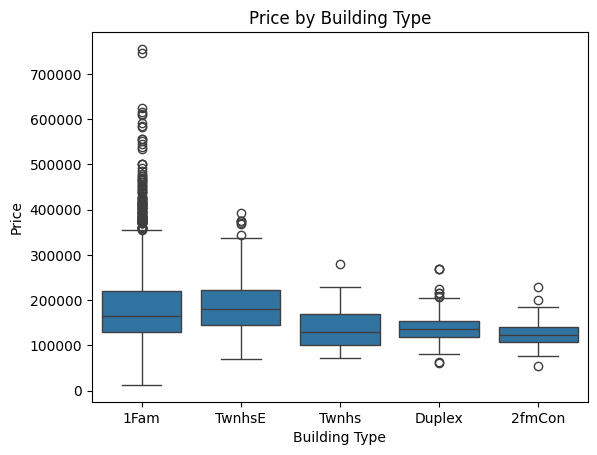

In [75]:
#Q7.4

#Boxplot of Price by Building Type
sns.boxplot(data=df_ames, x="Bldg.Type", y="price")
plt.title("Price by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Price")
plt.show()

**Q7.4 Answer:**

I notice that single family homes have the greatest price spread, with many high-priced outliers. On the opposite end, duplexes and two-family conversions have more tighter price distributions, with lower medians and extreme values.

In [76]:
#Q7.5

#Creating an outlier dummy variable using IQR rule
Q1 = df_ames["price"].quantile(0.25)
Q3 = df_ames["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_ames["outlier"] = (df_ames["price"] < lower_bound) | (df_ames["price"] > upper_bound)
df_ames["outlier"].value_counts()

,count
outlier,
False,2793
True,137


In [77]:
#Q7.6

#Winsorize the price variable
lower_w = df_ames["price"].quantile(0.01)
upper_w = df_ames["price"].quantile(0.99)

df_ames["price_winsor"] = df_ames["price"].clip(lower=lower_w, upper=upper_w)

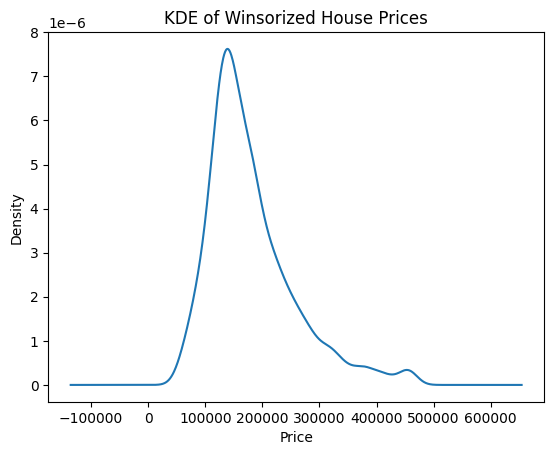

In [78]:
#Q7.6

#KDE plot of winsorized price
df_ames["price_winsor"].plot(kind="kde")
plt.xlabel("Price")
plt.title("KDE of Winsorized House Prices")
plt.show()

In [79]:
#Q7.6

#Describe table of winsorized price
df_ames["price_winsor"].describe()

,price_winsor
count,2930.000000
mean,180091.154334
std,75842.579174
min,61756.070000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,456666.370000


**Q7.6 Answer:**

After applying winsorization to price variable, the distribution is much less skewed: the highest prices decrease significantly, and both the mean and standard deviation are reduced. This indicates that extreme high-priced outliers no longer heavily influence the distribution.